In [ ]:
import pandas as pd
data=pd.read_csv("studentPer.csv")

In [ ]:
data.info()
data.describe()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [ ]:
data.isna().sum()
data.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
total_score,0
average_score,0


In [ ]:
data.dtypes

,0
gender,int64
race_ethnicity,object
parental_level_of_education,object
lunch,int64
test_preparation_course,int64
math_score,int64
reading_score,int64
writing_score,int64
total_score,int64
average_score,float64


In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [ ]:
# feature engineering
# adding perforamnce category
import numpy as np

# Define the conditions for the new column
conditions = [
    data['average_score'] >= 90,  # Excellent
    (data['average_score'] >= 80) & (data['average_score'] < 90),  # Very Good
    (data['average_score'] >= 70) & (data['average_score'] < 80),  # Good
    (data['average_score'] >= 60) & (data['average_score'] < 70),  # Average
    data['average_score'] < 60  # Needs Improvement
]

# Define the corresponding categories
categories = ['Excellent', 'Very Good', 'Good', 'Average', 'Needs Improvement']

# Use np.select to create the new column
data['performance'] = np.select(conditions, categories)

In [ ]:
data.head()['performance']

,performance
0,Good
1,Very Good
2,Excellent
3,Needs Improvement
4,Good


In [ ]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score', 'performance'],
      dtype='object')


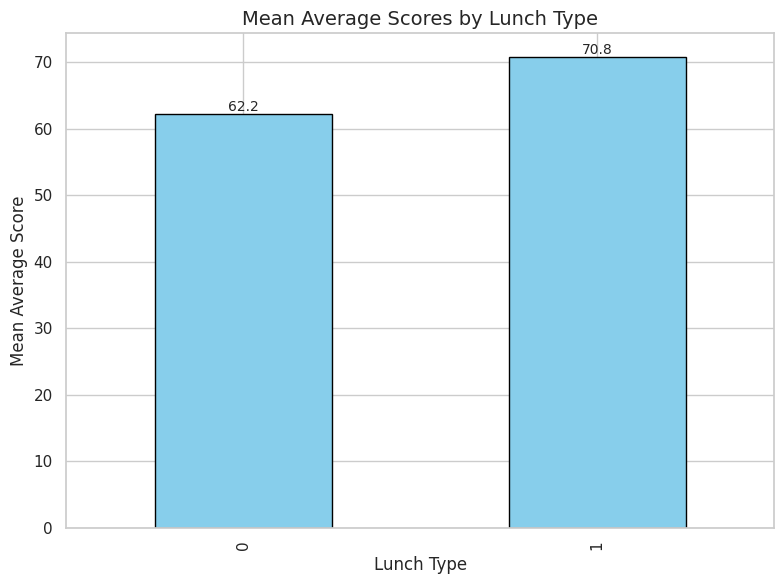

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean average score for each lunch category
mean_scores = data.groupby('lunch')['average_score'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Mean Average Scores by Lunch Type', fontsize=14)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Mean Average Score', fontsize=12)

# Add value labels on the bars
for i, value in enumerate(mean_scores):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


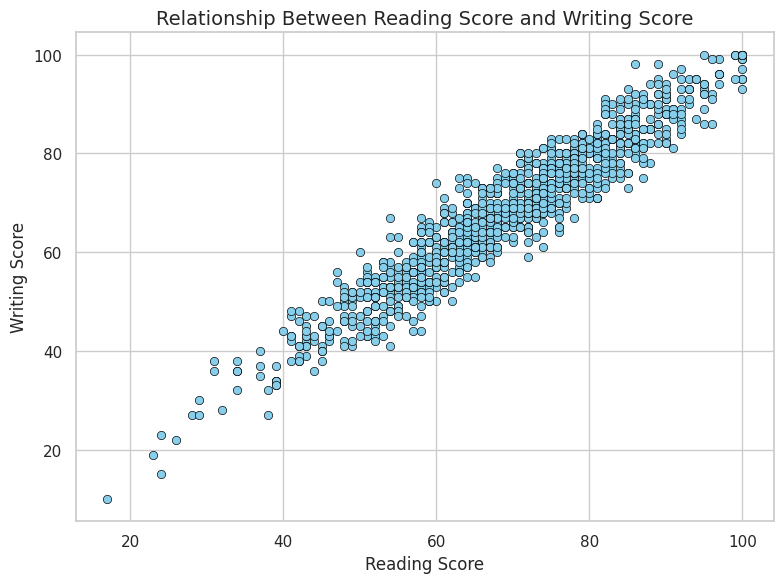

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to show the relationship between reading_score and writing_score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reading_score', y='writing_score', data=data, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Relationship Between Reading Score and Writing Score', fontsize=14)
plt.xlabel('Reading Score', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


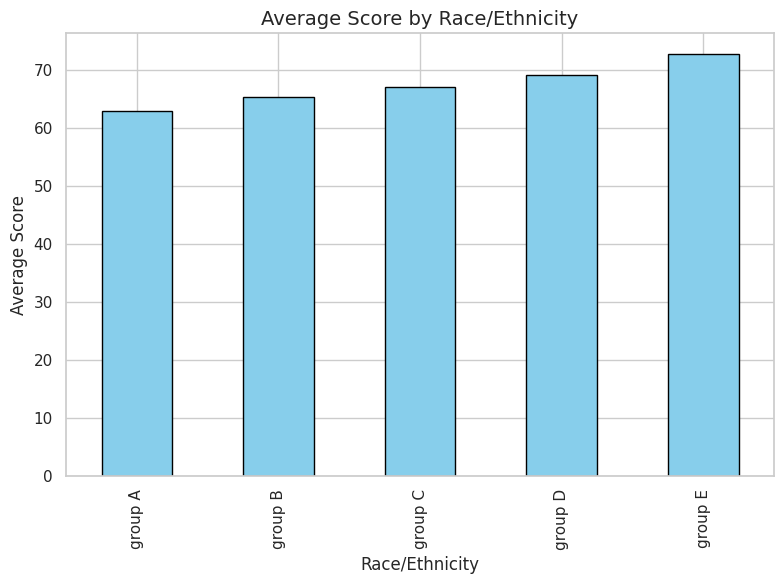

In [ ]:
import matplotlib.pyplot as plt

# Group by race_ethnicity and calculate the average of average_score
average_scores_by_race = data.groupby('race_ethnicity')['average_score'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
average_scores_by_race.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Score by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Average Score', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


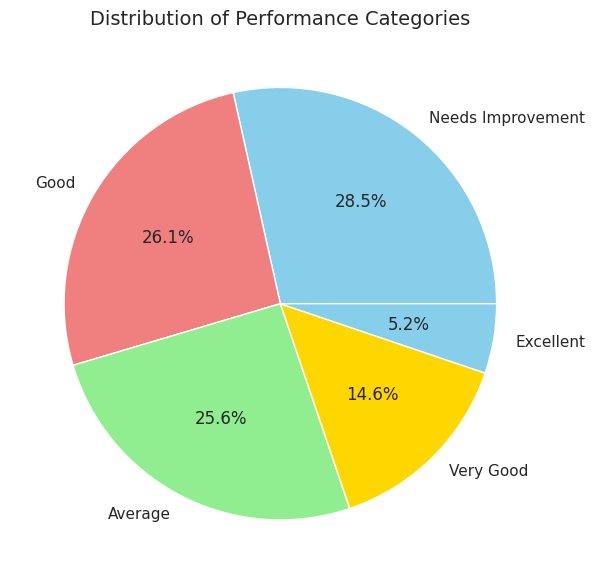

In [ ]:
import matplotlib.pyplot as plt

# Create a pie chart for the performance distribution
plt.figure(figsize=(8, 6))
data['performance'].value_counts().plot.pie(autopct="%1.1f%%", colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Add title and display the plot
plt.title('Distribution of Performance Categories', fontsize=14)
plt.ylabel('')  # Hides the ylabel for better clarity in pie chart
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


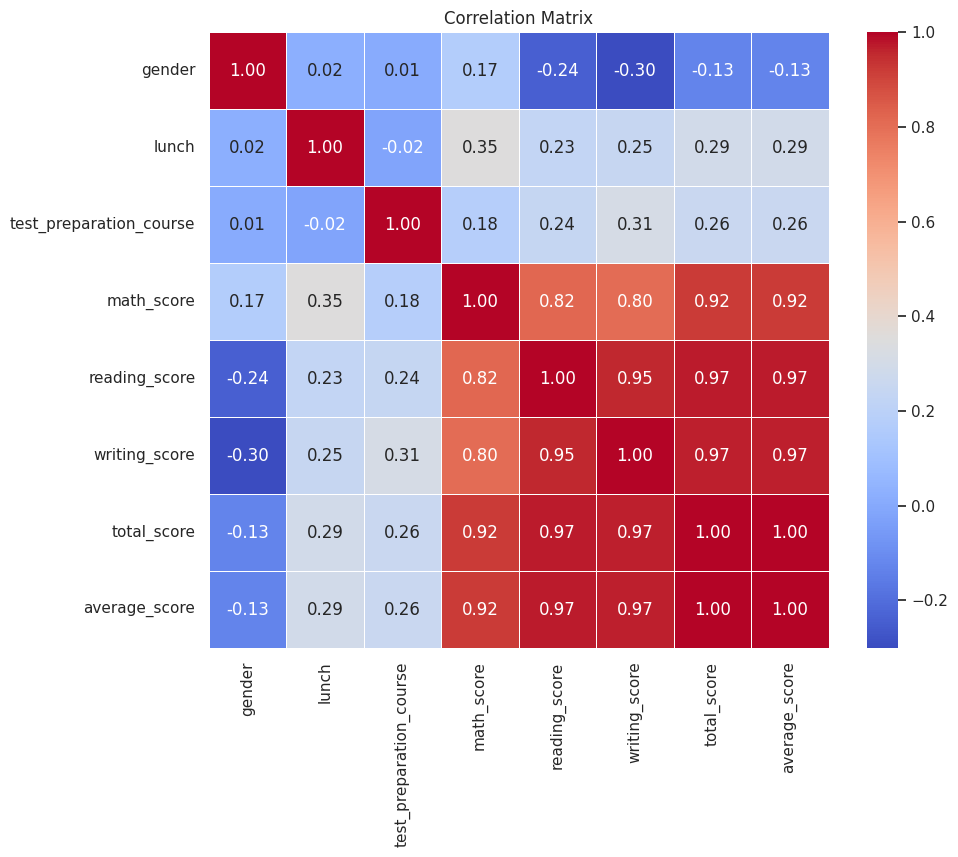

In [ ]:
numirec_data=data.select_dtypes(include=['number'])
corrleation_matrix=numirec_data.corr()
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corrleation_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
feature_to_drop=corrleation_matrix[corrleation_matrix>0.8].stack().index.tolist()

In [ ]:
print(feature_to_drop)

[('gender', 'gender'), ('lunch', 'lunch'), ('test_preparation_course', 'test_preparation_course'), ('math_score', 'math_score'), ('math_score', 'reading_score'), ('math_score', 'writing_score'), ('math_score', 'total_score'), ('math_score', 'average_score'), ('reading_score', 'math_score'), ('reading_score', 'reading_score'), ('reading_score', 'writing_score'), ('reading_score', 'total_score'), ('reading_score', 'average_score'), ('writing_score', 'math_score'), ('writing_score', 'reading_score'), ('writing_score', 'writing_score'), ('writing_score', 'total_score'), ('writing_score', 'average_score'), ('total_score', 'math_score'), ('total_score', 'reading_score'), ('total_score', 'writing_score'), ('total_score', 'total_score'), ('total_score', 'average_score'), ('average_score', 'math_score'), ('average_score', 'reading_score'), ('average_score', 'writing_score'), ('average_score', 'total_score'), ('average_score', 'average_score')]


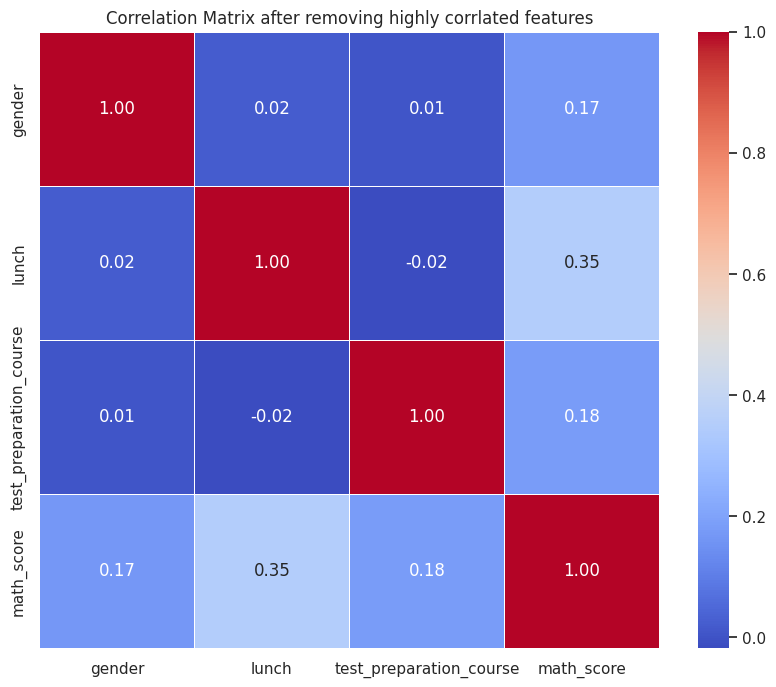

In [ ]:
# threshold 0.8
threshold=0.8
correlated_features = set()
for i in range(len(corrleation_matrix.columns)):
    for j in range(i):
        if abs(corrleation_matrix.iloc[i, j]) > threshold:
            correlated_features.add(corrleation_matrix.columns[i])
# Drop the highly corrleated features
numeric_data_dropped = numirec_data.drop(columns=correlated_features)
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix after removing highly corrlated features')
sns.heatmap(numeric_data_dropped.corr(), annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
data.to_csv('cleaned_data.csv', index=False)

In [ ]:
# prompt: calculate the euclate distance using data.iloc for tow record of the math_score , redaing_score and writing_score

import pandas as pd
import numpy as np

# Assuming 'data' DataFrame is already loaded as shown in the provided code.

def euclidean_distance(record1_index, record2_index):
    """
    Calculates the Euclidean distance between two records based on math_score, reading_score, and writing_score.

    Args:
        record1_index: Index of the first record in the DataFrame.
        record2_index: Index of the second record in the DataFrame.

    Returns:
        The Euclidean distance between the two records.
    """
    record1 = data.iloc[record1_index][['math_score', 'reading_score', 'writing_score']]
    record2 = data.iloc[record2_index][['math_score', 'reading_score', 'writing_score']]
    distance = np.sqrt(np.sum((record1 - record2)**2))
    return distance

# Example usage:
record1_index = 0  # Replace with the actual index of the first record
record2_index = 1  # Replace with the actual index of the second record
distance = euclidean_distance(record1_index, record2_index)
print(f"The Euclidean distance between tow student {record1_index} and {record2_index} is: {distance}")

The Euclidean distance between records 0 and 1 is: 23.0


In [ ]:
# calculating the probability distrbuition of performance
performance_count=data['performance'].value_counts()
total=len(data['performance'])
# calculating the probability for each category
probabilities=performance_count/total

# calculate the entropy
entropy=-np.sum(probabilities*np.log2(probabilities))
print(entropy)

2.152240407537678


In [ ]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,performance
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667,Good
1,0,group C,some college,1,1,69,90,88,247,82.333333,Very Good
2,0,group B,master's degree,1,0,90,95,93,278,92.666667,Excellent
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333,Needs Improvement
4,1,group C,some college,1,0,76,78,75,229,76.333333,Good
...,...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000,Excellent
996,1,group C,high school,0,0,62,55,55,172,57.333333,Needs Improvement
997,0,group C,high school,0,1,59,71,65,195,65.000000,Average
998,0,group D,some college,1,1,68,78,77,223,74.333333,Good


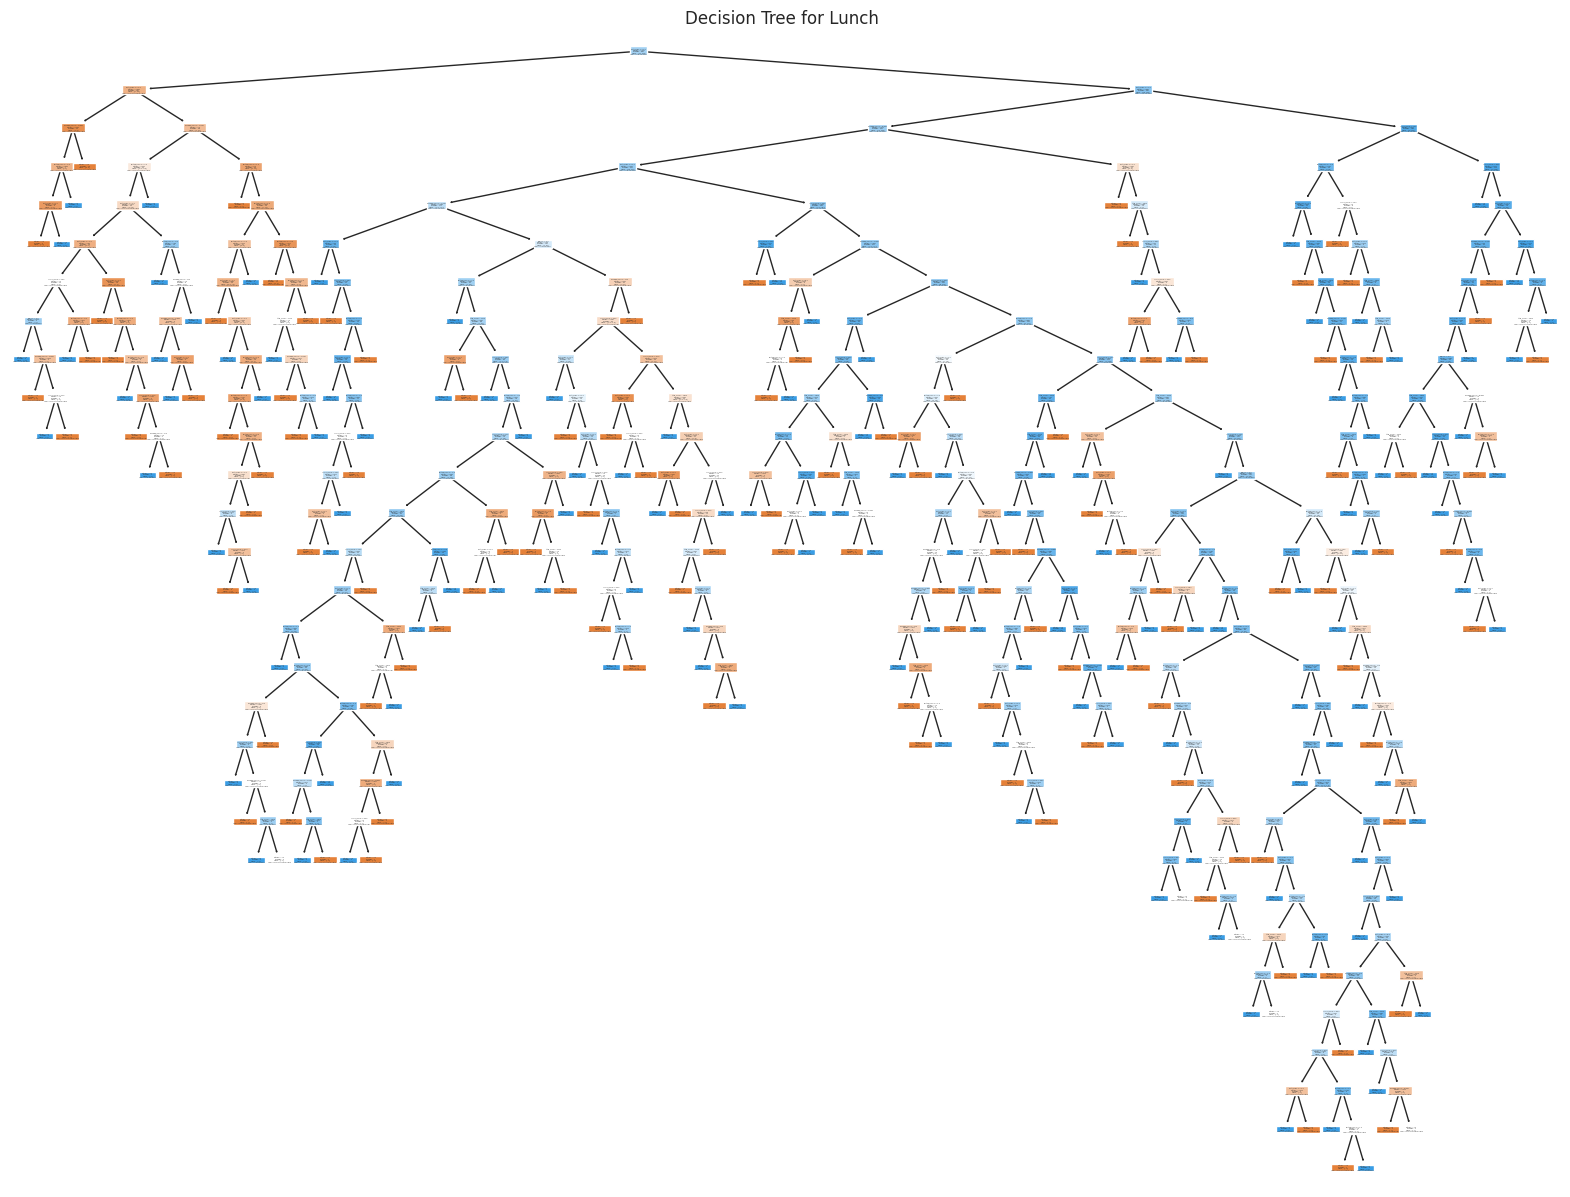

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
# prepare data for classifications
X=data[['gender','writing_score','reading_score','math_score','average_score','total_score']]
y=data['lunch']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# bulid decision tree using Hunt's "ID3" algorthim..
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
# visulaization
plt.figure(figsize=(20, 15))
tree.plot_tree(clf,filled=True,feature_names=X.columns,class_names=['Does Not Receive Lunch', 'Receives Lunch'])
plt.title("Decision Tree for Lunch ")
plt.show()


In [ ]:
# Step Evaluate the model accuracy
accuracy=clf.score(X_test,y_test)
print(f"The accuracy is eqaul {round(100*accuracy,1)}")

The accuracy is eqaul 56.5


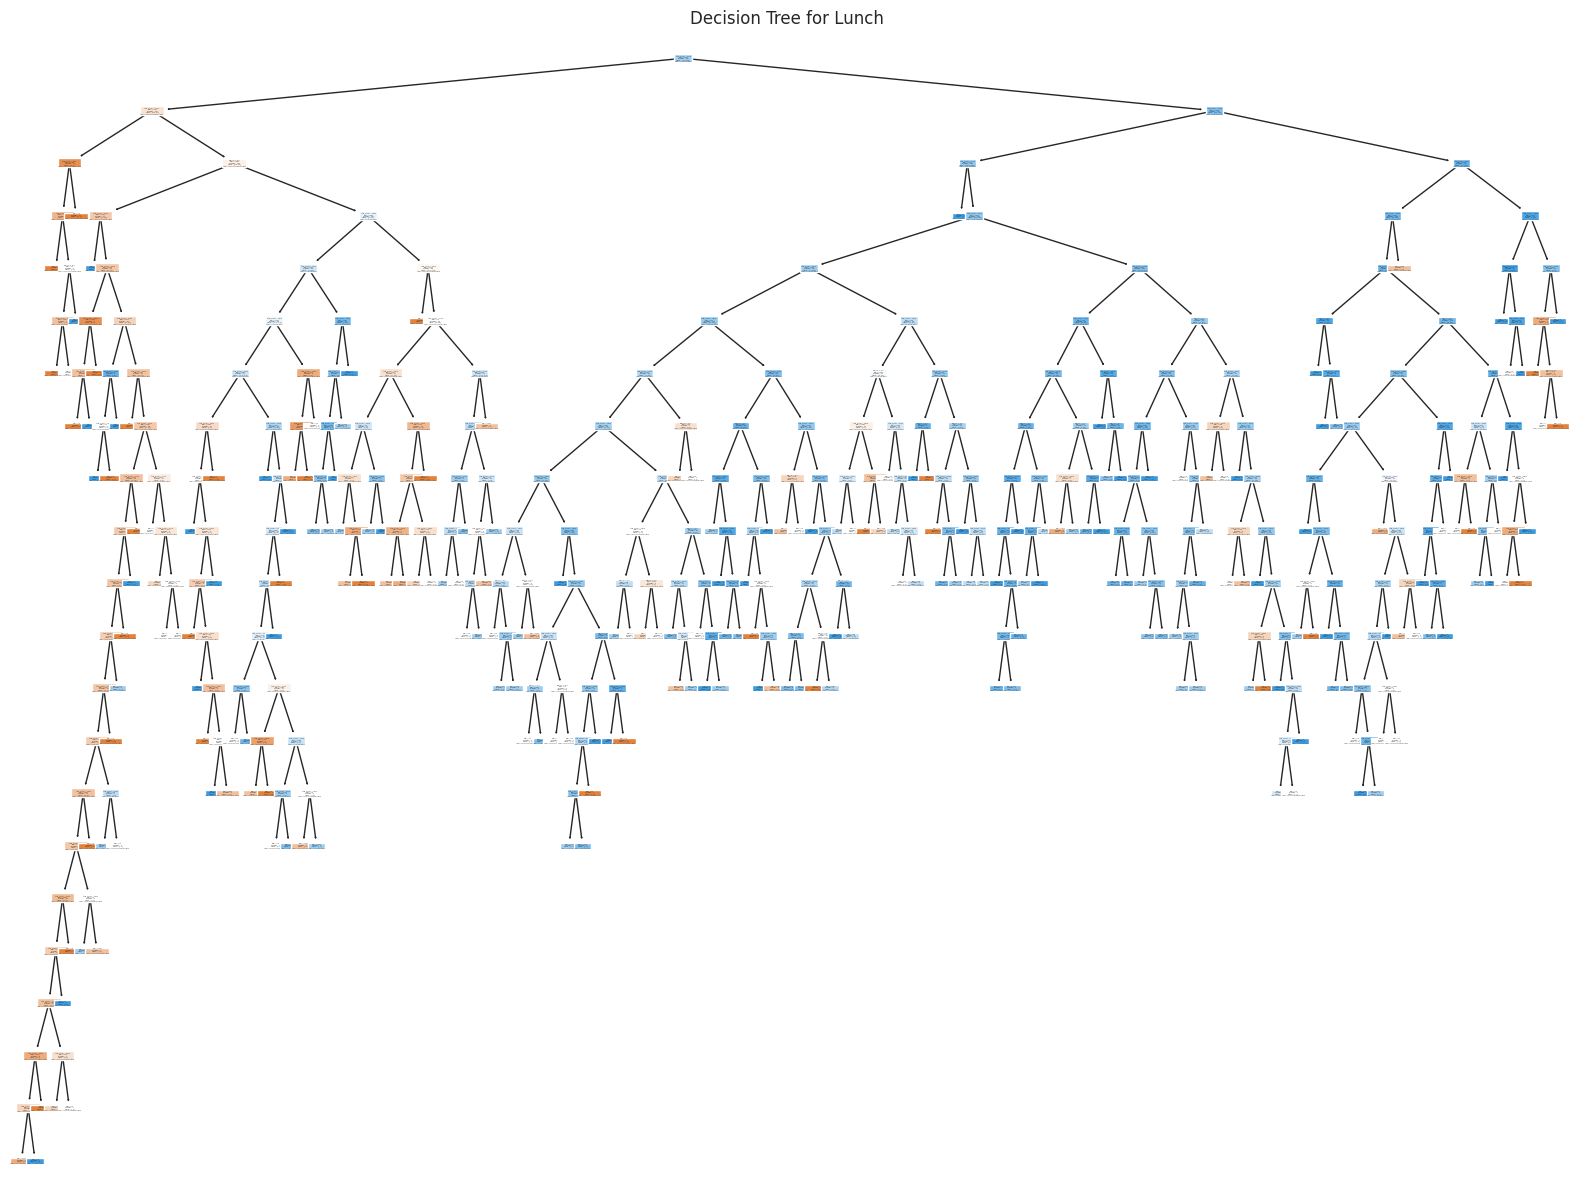

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
# prepare data for classifications
X=data[['gender','writing_score','reading_score','math_score','average_score','total_score']]
y=data['lunch']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# bulid decision tree using Cart algorthim..
clf=DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
# visulaization
plt.figure(figsize=(20, 15))
tree.plot_tree(clf,filled=True,feature_names=X.columns,class_names=['Does Not Receive Lunch', 'Receives Lunch'])
plt.title("Decision Tree for Lunch ")
plt.show()


In [ ]:
# Step Evaluate the model accuracy
accuracy=clf.score(X_test,y_test)
print(f"The accuracy is eqaul {round(100*accuracy,1)}")
# the cart is less than ID3

The accuracy is eqaul 56.0


In [ ]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score', 'performance'],
      dtype='object')

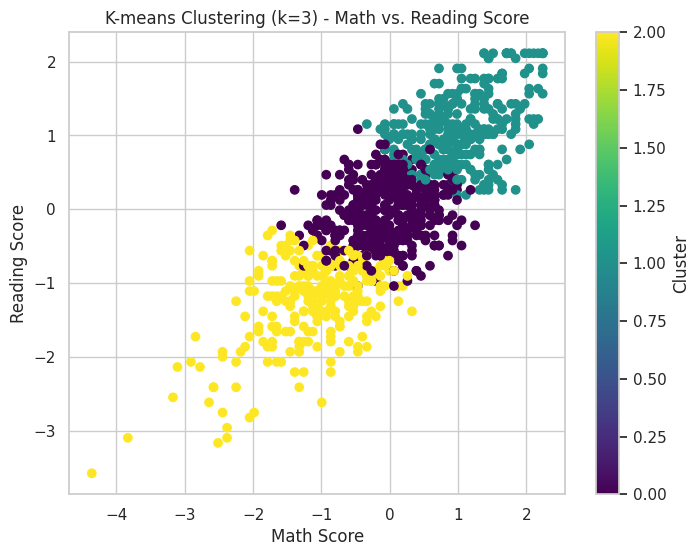

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = [
    'math_score',
    'reading_score',
    'writing_score',
    'gender',
    'average_score',
    'total_score'
]
X = data[features]  # Using .loc for clarity (optional)

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=0)
data['kmeans_cluster_3'] = kmeans_3.fit_predict(X_scaled)  # Lowercase 'cluster'

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the scatter plot for the first two features (math_score and reading_score)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['kmeans_cluster_3'], cmap='viridis')

# Add meaningful labels
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('K-means Clustering (k=3) - Math vs. Reading Score')

# Show the color bar to indicate cluster groupings
plt.colorbar(label='Cluster')

# Display the plot
plt.show()


<Figure size 800x600 with 0 Axes>

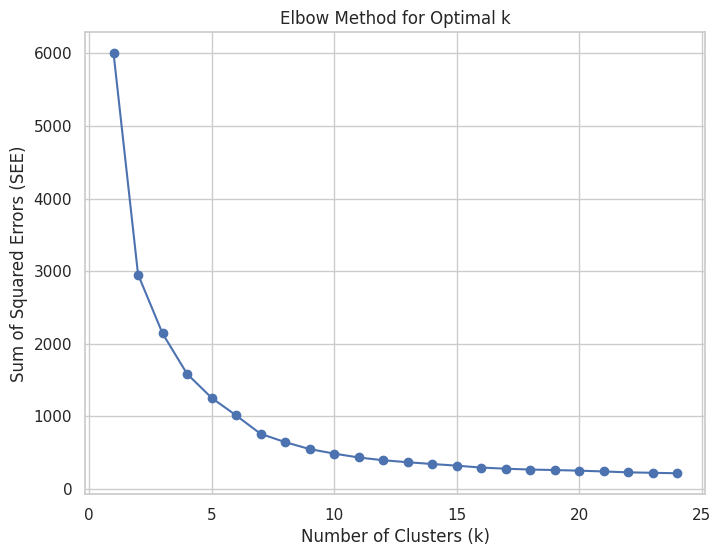

In [ ]:
features = [
    'math_score',
    'reading_score',
    'writing_score',
    'gender',
    'average_score',
    'total_score'
]
X = data[features]  # Using .loc for clarity (optional)

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=0)
data['kmeans_cluster_3'] = kmeans_3.fit_predict(X_scaled)  # Lowercase 'cluster'



see = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    see.append(kmeans.inertia_)

# Plot the SEE values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), see, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SEE)')
plt.title('Elbow Method for Optimal k')
plt.show()

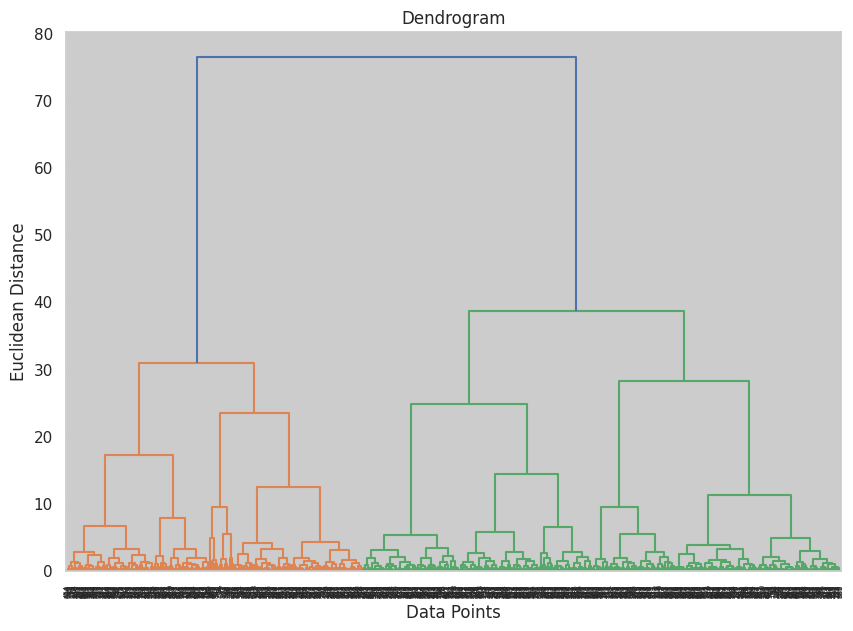

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
features = [
    'math_score',
    'reading_score',
    'writing_score',
    'gender',
    'average_score',
    'total_score'
]
X = data[features]  # Using .loc for clarity (optional)

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=0)
data['kmeans_cluster_3'] = kmeans_3.fit_predict(X_scaled)  # Lowercase 'cluster'


# Create dendrogram
linked = linkage(X_scaled, 'ward')  # 'ward' linkage minimizes variance
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=data.index,
            distance_sort='asceding',
            )
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

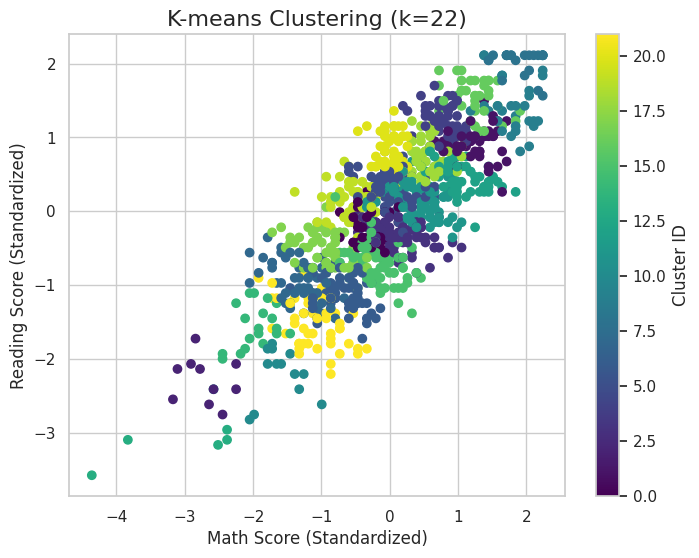

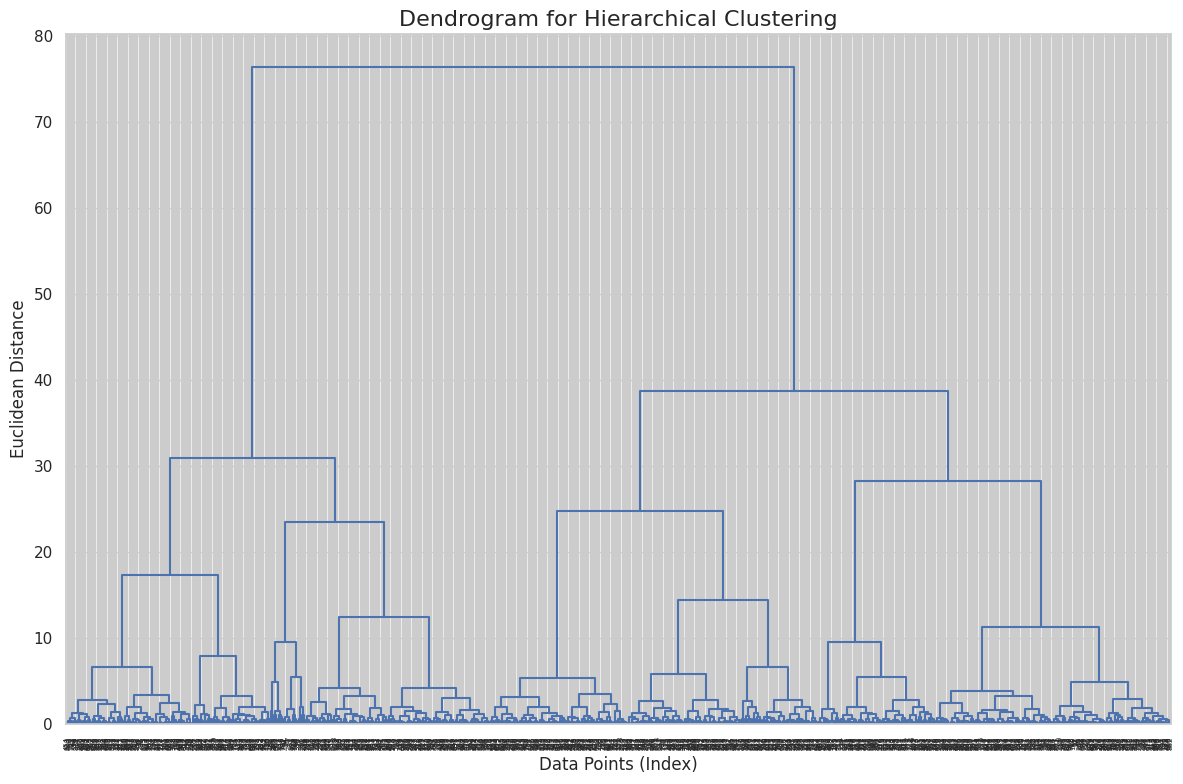

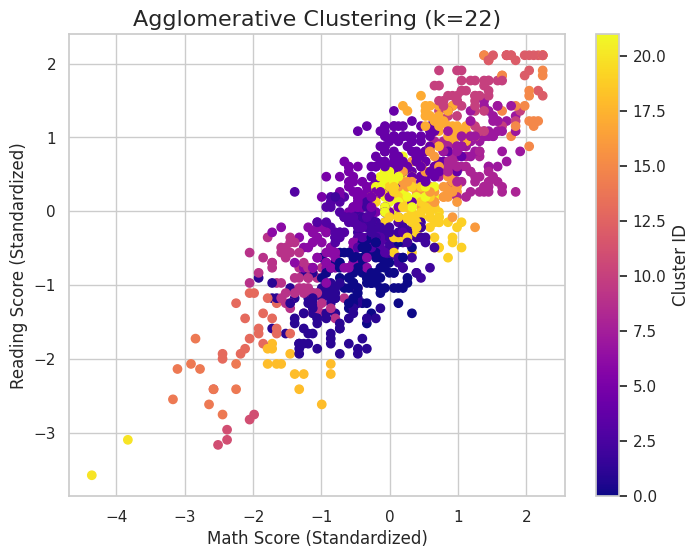

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Select relevant features for clustering
features = [
    'math_score',
    'reading_score',
    'writing_score',
    'gender',
    'average_score',
    'total_score'
]
X = data[features]  # Select features for clustering

# Standardize the features for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=22
kmeans_3 = KMeans(n_clusters=22, random_state=0)
data['kmeans_cluster_22'] = kmeans_3.fit_predict(X_scaled)  # Added cluster names

# Plot K-means Clustering Results (optional enhancement)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['kmeans_cluster_22'], cmap='viridis')
plt.title('K-means Clustering (k=22)', fontsize=16)
plt.xlabel('Math Score (Standardized)', fontsize=12)
plt.ylabel('Reading Score (Standardized)', fontsize=12)
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

# Create Dendrogram for Agglomerative Clustering
linked = linkage(X_scaled, 'ward')  # 'ward' linkage minimizes variance within clusters
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
dendrogram(linked,
            orientation='top',
            labels=data.index,
            distance_sort='ascending',
            color_threshold=0)  # Optional: Color clusters in dendrogram
plt.title('Dendrogram for Hierarchical Clustering', fontsize=16)
plt.xlabel('Data Points (Index)', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.tight_layout()  # Ensure everything fits in the plot
plt.show()

# Apply AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=22)
data['agg_cluster_22'] = agg_clustering.fit_predict(X_scaled)  # Adding Agglomerative clusters

# Visualize Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['agg_cluster_22'], cmap='plasma')
plt.title('Agglomerative Clustering (k=22)', fontsize=16)
plt.xlabel('Math Score (Standardized)', fontsize=12)
plt.ylabel('Reading Score (Standardized)', fontsize=12)
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()


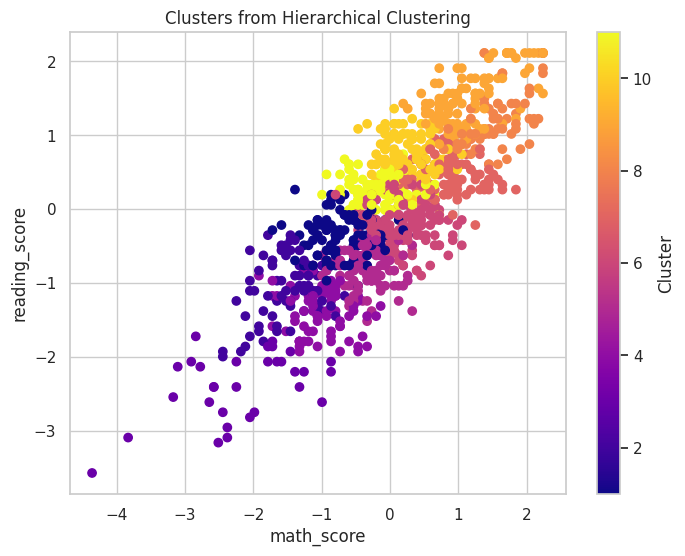

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Nested Clustring
features = [
    'math_score',
    'reading_score',
    'writing_score',
    'gender',
    'average_score',
    'total_score'
]
X = data[features]  # Select features for clustering

# Standardize the features for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
# Define distance threshold and generate clusters
distance_threshold = 10  #based on the dendrogram
data['hierarchical_cluster'] = fcluster(linked, distance_threshold, criterion='distance')

# Scatter plot to visualize clusters (2D projection for the first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['hierarchical_cluster'], cmap='plasma')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Clusters from Hierarchical Clustering')
plt.colorbar(label='Cluster')
plt.show()